In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("gold_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df.drop('Date', axis=1, inplace=True)

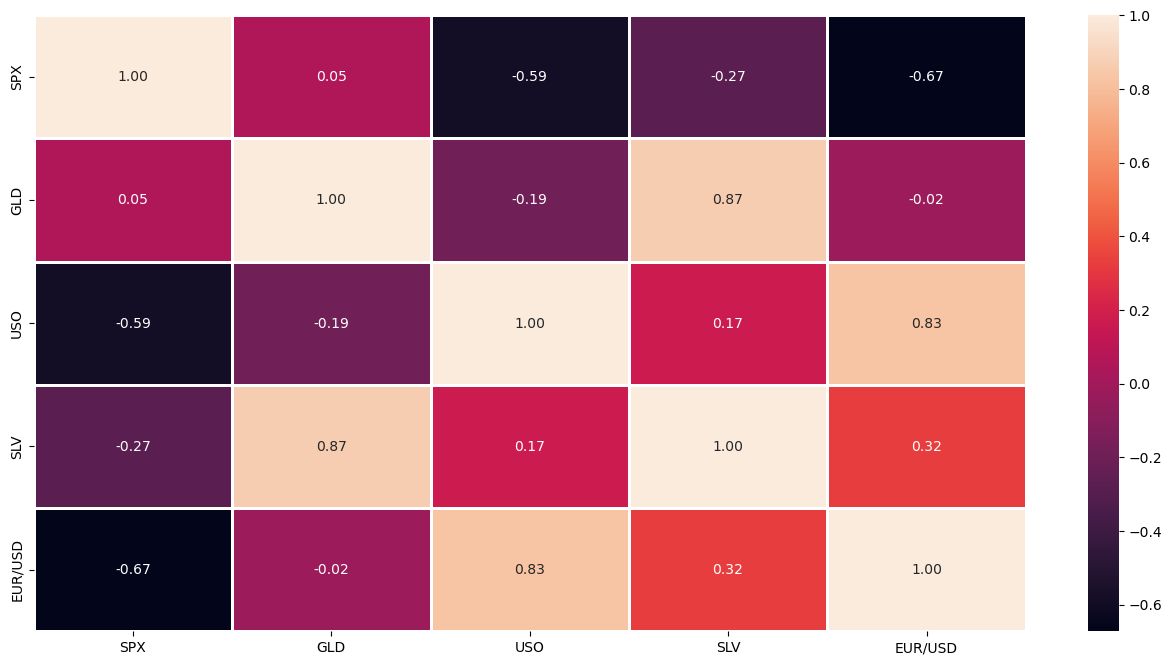

In [9]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth =1 )
plt.show()

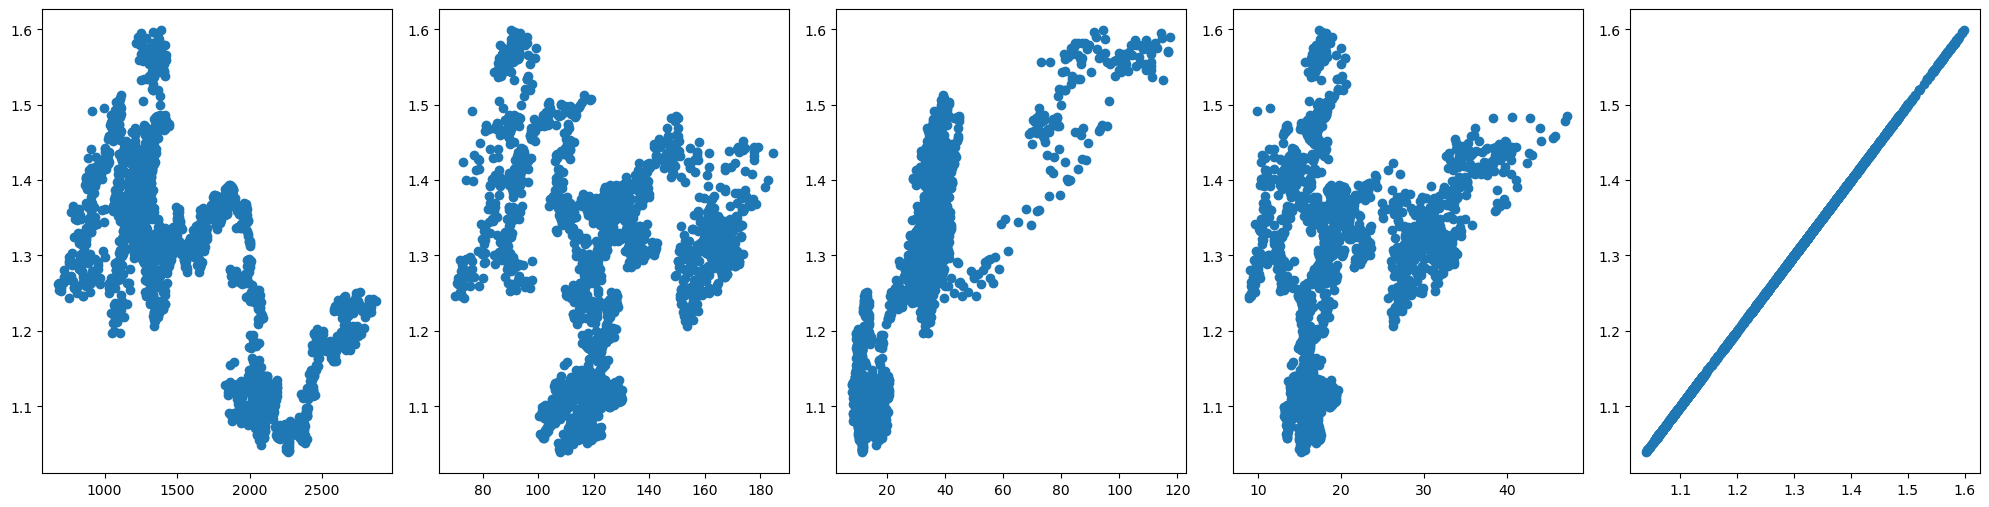

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 5:
        ax = plt.subplot(3, 5, plotnumber)
        plt.scatter(df[column],df["EUR/USD"])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

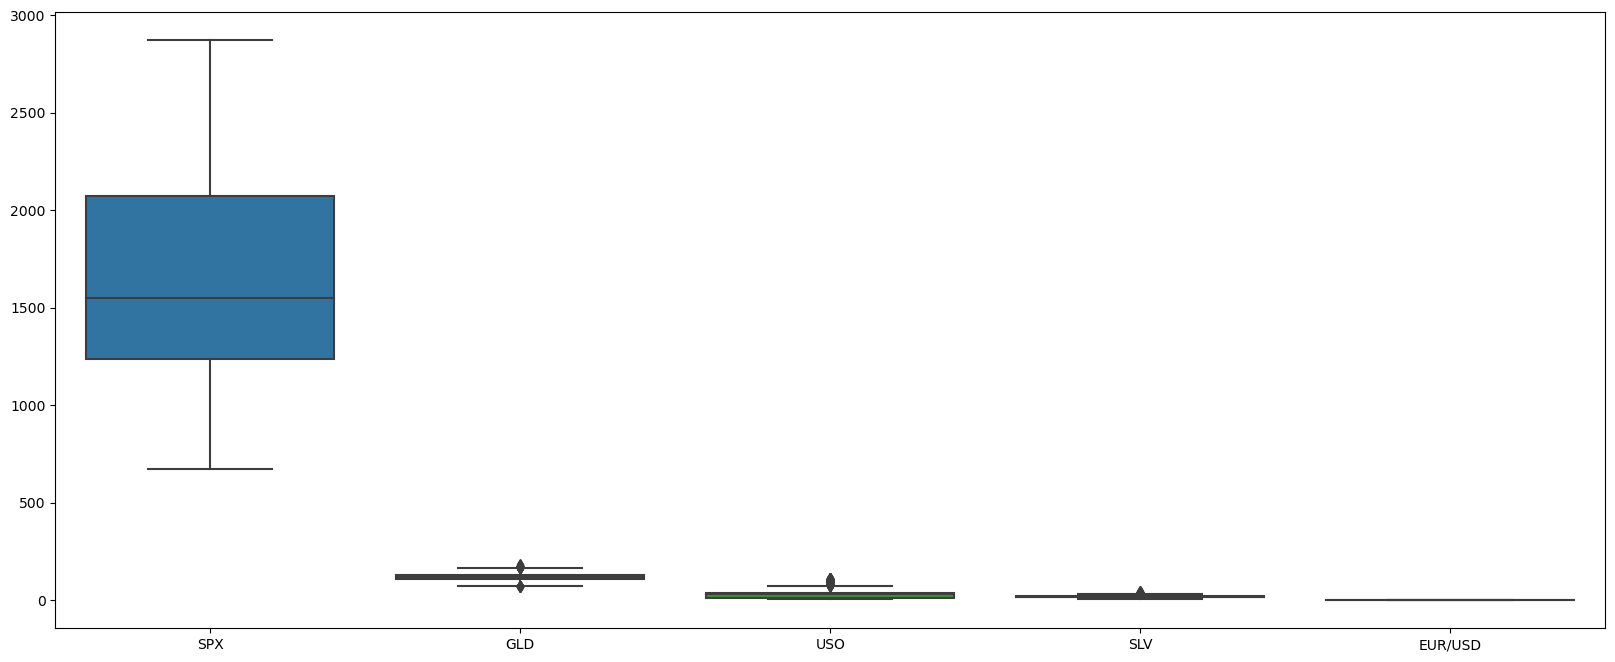

In [18]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

In [40]:
X=df.drop('EUR/USD',axis=1)
y=df[['EUR/USD']]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.39914541, -1.62696317,  2.38880956, -0.6917197 ],
       [-0.39914541, -1.59646265,  2.38368652, -0.67691224],
       [-0.46760428, -1.61536454,  2.32938091, -0.69355301],
       ...,
       [ 2.05926403,  0.1051249 , -0.89307824, -0.61274655],
       [ 2.0728668 ,  0.07548343, -0.89461519, -0.63813078],
       [ 2.06448555, -0.00812239, -0.89329341, -0.65305106]])

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [43]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [45]:
max_leaf_nodes = [5, 25, 50, 100, 250, 500]
my_mae={nodes:get_mae(nodes, X_train,X_test,y_train,y_test) for nodes in max_leaf_nodes}
best_tree_size = min(my_mae, key=my_mae.get)
best_tree_size

500

In [46]:
dt_model=DecisionTreeRegressor(max_leaf_nodes=best_tree_size,random_state=0)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

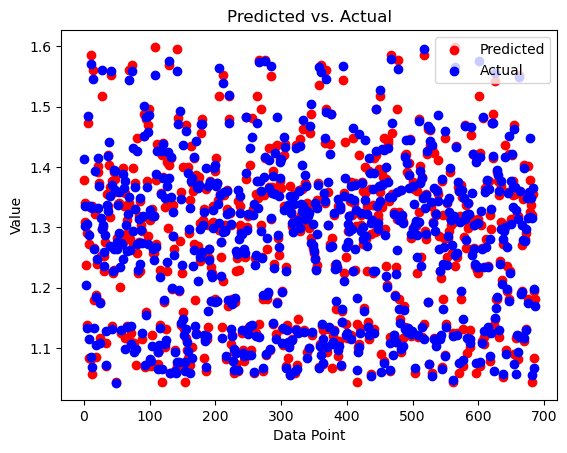

In [47]:
import matplotlib.pyplot as plt

# Assuming you have the predicted values in a variable called 'y_pred'
# And the actual test values in a variable called 'y_test'

# Plotting the predicted values
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')

# Plotting the actual test values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Predicted vs. Actual')

plt.legend()
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
mse

0.0005929783163063146

In [57]:
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred) 
rmse

0.02435114609841423

In [59]:
r2

0.9659522994975416